In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
LPA = pd.read_csv(r'D:\PWG_data\To\BG_MQC\data\11pc\Wafer_Thickness.csv')

In [3]:
LPA.head()

,Pre/Post Grinding,slot,Thickness_Target(um),No,X,Y,Thickness(um)
0,Pre,15,775,1,126.96,53.08,773.99
1,Pre,15,775,2,126.96,20.79,774.17
2,Pre,15,775,3,126.96,-11.50,774.14
3,Pre,15,775,4,126.96,-43.79,774.21
4,Pre,15,775,5,101.47,101.51,774.08


In [4]:
LPA['X_60']=np.round(np.round((LPA['X']+0.03)/0.06)*0.06-0.03,2)
LPA['Y_60']=np.round(np.round((LPA['Y']+0.03)/0.06)*0.06-0.03,2)
LPA.head()

,Pre/Post Grinding,slot,Thickness_Target(um),No,X,Y,Thickness(um),X_60,Y_60
0,Pre,15,775,1,126.96,53.08,773.99,126.93,53.07
1,Pre,15,775,2,126.96,20.79,774.17,126.93,20.79
2,Pre,15,775,3,126.96,-11.50,774.14,126.93,-11.49
3,Pre,15,775,4,126.96,-43.79,774.21,126.93,-43.77
4,Pre,15,775,5,101.47,101.51,774.08,101.49,101.49


In [5]:
LPA_post = LPA[LPA['Pre/Post Grinding']=='Post']
LPA_post.head()

,Pre/Post Grinding,slot,Thickness_Target(um),No,X,Y,Thickness(um),X_60,Y_60
869,Post,15,695,1,126.96,53.08,694.53,126.93,53.07
870,Post,15,695,2,126.96,20.79,694.61,126.93,20.79
871,Post,15,695,3,126.96,-11.50,694.60,126.93,-11.49
872,Post,15,695,4,126.96,-43.79,694.51,126.93,-43.77
873,Post,15,695,5,101.47,101.51,694.68,101.49,101.49


## Plot measuring locations

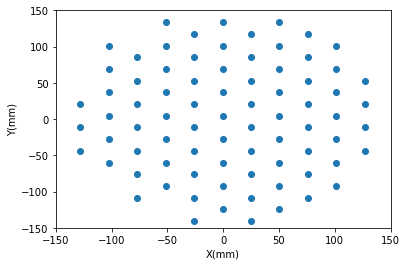

In [7]:
LPA_15 = LPA_post[LPA_post['slot']==15]
plt.scatter(LPA_15['X_60'], LPA_15['Y_60'])
plt.xlabel('X(mm)')
plt.ylabel('Y(mm)')
plt.ylim(-150,150)
plt.xlim(-150,150)
plt.figure(figsize=(5,10))
plt.show()

## Correlation between LPA and PWG measurements(at 60um res)

slot 15: r_square is 0.977354; slope is 0.948842; intercept is 35.992942
slot 16: r_square is 0.972043; slope is 0.979601; intercept is 14.433516
slot 17: r_square is 0.970202; slope is 0.968679; intercept is 21.602387
slot 18: r_square is 0.981998; slope is 0.972765; intercept is 18.607788
slot 19: r_square is 0.981761; slope is 0.980510; intercept is 13.279312
slot 20: r_square is 0.809506; slope is 0.866056; intercept is 93.550806
slot 21: r_square is 0.813282; slope is 0.870054; intercept is 89.477544
slot 22: r_square is 0.866992; slope is 0.892194; intercept is 73.276595
slot 23: r_square is 0.872290; slope is 0.796053; intercept is 136.209115
slot 24: r_square is 0.903183; slope is 0.922378; intercept is 51.432376


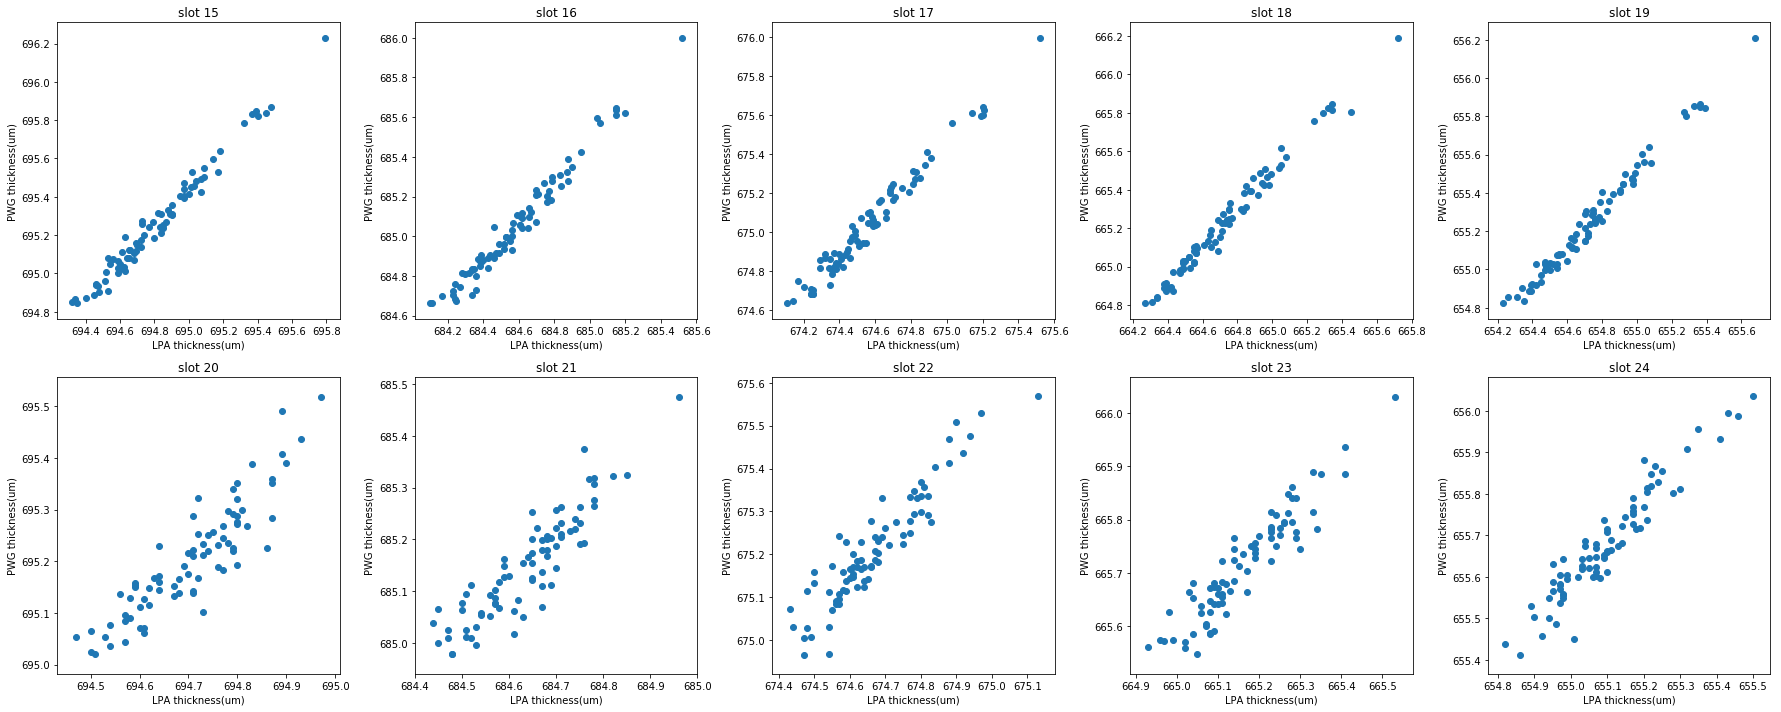

In [8]:
fig, axs = plt.subplots(2,5,figsize=(25,10))

for i in range(2):
    for j in range(5):
        slot_num = 15+i*5+j
        pwg_temp = pd.read_csv(r'D:\PWG_data\To\BG_MQC\data\11pc\maps\Carrier01.' + str(slot_num)+'~Carrier01~TSB LPA precision~thickness.csv', skiprows=11)
        pwg_temp['X_60']=pwg_temp['X [um]']/1000
        pwg_temp['Y_60']=pwg_temp['Y [um]']/1000
        LPA_temp = LPA_post[LPA_post['slot']==slot_num]
        corr = pd.merge(LPA_temp, pwg_temp, how='left', on=['X_60','Y_60'])
        corr = corr.dropna(subset=['Thickness [um]'])
        
        axs[i,j].scatter(corr['Thickness(um)'], corr['Thickness [um]'])
        axs[i,j].set_xlabel('LPA thickness(um)')
        axs[i,j].set_ylabel('PWG thickness(um)')
        axs[i,j].set_title('slot ' + str(slot_num))
    
        slope, intercept, r,_,_=stats.linregress(corr['Thickness(um)'],corr['Thickness [um]'])
        print("slot %d: r_square is %f; slope is %f; intercept is %f" %(slot_num, r**2, slope, intercept))

plt.tight_layout()
plt.show()
        

## Correlation between LPA and PWG measurements(at 60um res) @slot25(Bare)

slot25 r_square is 0.275744713503


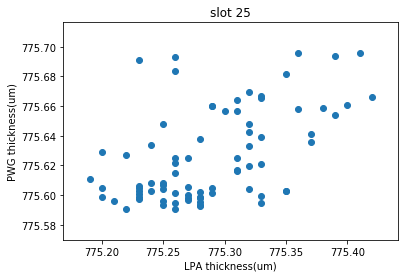

In [11]:
slot_num = 25
pwg_temp = pd.read_csv(r'D:\PWG_data\To\BG_MQC\data\11pc\maps\Carrier01.' + str(slot_num)+'~Carrier01~TSB LPA precision~thickness.csv', skiprows=11)
pwg_temp['X_60']=pwg_temp['X [um]']/1000
pwg_temp['Y_60']=pwg_temp['Y [um]']/1000
LPA_temp = LPA_post[LPA_post['slot']==slot_num]
corr = pd.merge(LPA_temp, pwg_temp, how='left', on=['X_60','Y_60'])
corr = corr.dropna(subset=['Thickness [um]'])

plt.scatter(corr['Thickness(um)'], corr['Thickness [um]'])
plt.xlabel('LPA thickness(um)')
plt.ylabel('PWG thickness(um)')
plt.title('slot ' + str(slot_num))
plt.figure(figsize=(5,5))

_,_,r,_,_=stats.linregress(corr['Thickness(um)'],corr['Thickness [um]'])
print("slot"+str(slot_num) + " r_square is " + str(r**2))
plt.show()

## Overlaying LPA and PWG measurments shows a clear offset

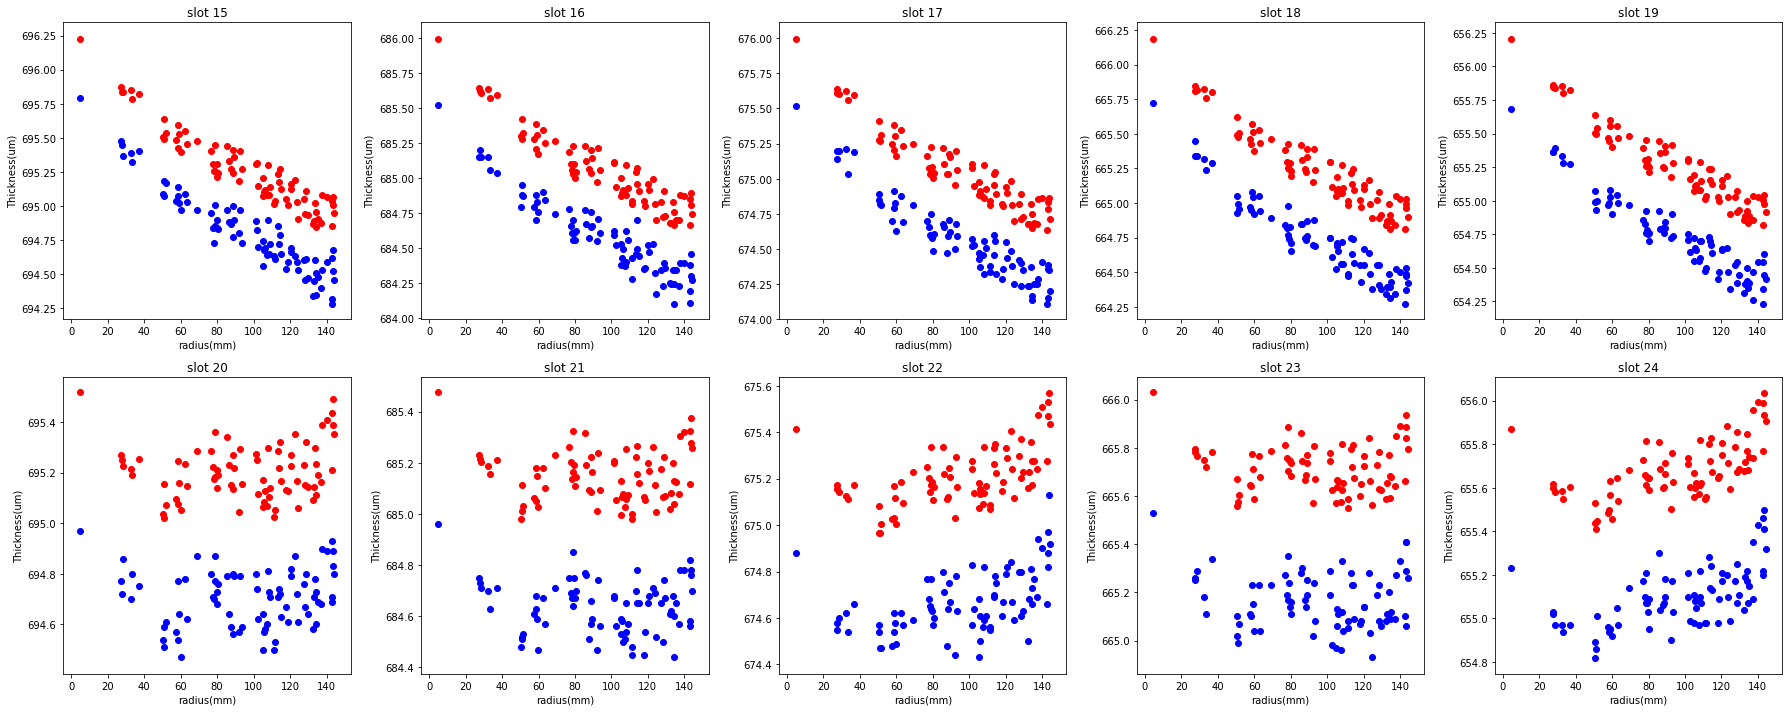

In [12]:
fig, axs = plt.subplots(2,5,figsize=(25,10))

for i in range(2):
    for j in range(5):
        slot_num = 15+i*5+j
        pwg_temp = pd.read_csv(r'D:\PWG_data\To\BG_MQC\data\11pc\maps\Carrier01.' + str(slot_num)+'~Carrier01~TSB LPA precision~thickness.csv', skiprows=11)
        pwg_temp['X_60']=pwg_temp['X [um]']/1000
        pwg_temp['Y_60']=pwg_temp['Y [um]']/1000
        pwg_temp['radius']=np.sqrt(pwg_temp['X_60']**2 + pwg_temp['Y_60']**2)
        LPA_temp = LPA_post[LPA_post['slot']==slot_num]
        corr = pd.merge(LPA_temp, pwg_temp, how='left', on=['X_60','Y_60'])
        #corr = corr[~corr['Thickness [um]'].isnull()]
        
        axs[i,j].scatter(corr['radius'], corr['Thickness(um)'],c='b') #LPA thickness
        axs[i,j].scatter(corr['radius'], corr['Thickness [um]'],c='r') #PWG thickness
        axs[i,j].set_xlabel('radius(mm)')
        axs[i,j].set_ylabel('Thickness(um)')
        axs[i,j].set_title('slot ' + str(slot_num))
plt.tight_layout()    
plt.show()
        

In [13]:
LPA_post.groupby('slot').mean()

,Thickness_Target(um),No,X,Y,Thickness(um),X_60,Y_60
slot,,,,,,,
15,695,40,4.021519,1.783291,694.805316,4.018101,1.782911
16,685,40,4.021519,1.783291,684.580127,4.018101,1.782911
17,675,40,4.021519,1.783291,674.563544,4.018101,1.782911
18,665,40,4.021519,1.783291,664.727595,4.018101,1.782911
19,655,40,4.021519,1.783291,654.731392,4.018101,1.782911
20,695,40,4.021519,1.783291,694.705316,4.018101,1.782911
21,685,40,4.021519,1.783291,684.637089,4.018101,1.782911
22,675,40,4.021519,1.783291,674.670127,4.018101,1.782911
23,665,40,4.021519,1.783291,665.162658,4.018101,1.782911


## Plotting the relation between mean thickness measured by both tools

In [14]:
mean_list = []
for i in range(2):
    for j in range(5):
        slot_num = 15+i*5+j
        pwg_temp = pd.read_csv(r'D:\PWG_data\To\BG_MQC\data\11pc\maps\Carrier01.' + str(slot_num)+'~Carrier01~TSB LPA precision~thickness.csv', skiprows=11)
        pwg_temp['X_60']=pwg_temp['X [um]']/1000
        pwg_temp['Y_60']=pwg_temp['Y [um]']/1000
        LPA_temp = LPA_post[LPA_post['slot']==slot_num]
        corr = pd.merge(LPA_temp, pwg_temp, how='left', on=['X_60','Y_60'])
        mean_list.append((corr['Thickness(um)'].mean(),corr['Thickness [um]'].mean()))

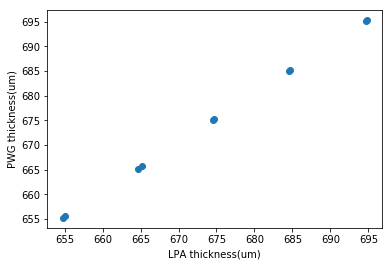

slope is 0.998127, intercept is 1.776377, r2 is 0.999997


In [16]:
A = pd.DataFrame(mean_list, columns=['LPA thickness','PWG thickness'])
plt.scatter(A['LPA thickness'], A['PWG thickness'])
plt.xlabel('LPA thickness(um)')
plt.ylabel('PWG thickness(um)')
plt.figure(figsize=(5,5))
plt.show()

slope,intercept,r,_,_=stats.linregress(A['LPA thickness'], A['PWG thickness'])
print("slope is %f, intercept is %f, r2 is %f" %(slope, intercept, r*r))

## Extend to collections of 60um pixels

In [17]:
#Compute index of pixels, so will only need to read those data for later computation
n = 1 #one side pixel number
pixel_num = 2*n + 1 

pwg_temp = pd.read_csv(r'D:\PWG_data\To\BG_MQC\data\11pc\maps\Carrier01.' + str(15)+'~Carrier01~TSB LPA precision~thickness.csv', 
                       skiprows=11, usecols=['X [um]','Y [um]','Thickness [um]'])

xy_list = [(LPA_15.iloc[i]['X_60'],LPA_15.iloc[i]['Y_60']) for i in range(len(LPA_15))]
pwg_index = []
for (x,y) in xy_list:
    for m in range(pixel_num):
        for k in range(pixel_num):
            x_temp = x - n*60/1000 + k*60/1000
            y_temp = y - n*60/1000 + m*60/1000
            index_temp = pwg_temp.loc[(pwg_temp['X [um]']/1000==x_temp)&(pwg_temp['Y [um]']/1000==y_temp)].index.values.astype(int)
            if len(index_temp) > 0:
                pwg_index.append(index_temp[0])

slot 15: r_square is 0.976263; slope is 0.947544; intercept is 36.895571
slot 16: r_square is 0.974628; slope is 0.971343; intercept is 20.089965
slot 17: r_square is 0.970928; slope is 0.960801; intercept is 26.919062
slot 18: r_square is 0.981899; slope is 0.968282; intercept is 21.588553
slot 19: r_square is 0.981093; slope is 0.976960; intercept is 15.605000
slot 20: r_square is 0.808540; slope is 0.865088; intercept is 94.223380
slot 21: r_square is 0.828327; slope is 0.880046; intercept is 82.638083
slot 22: r_square is 0.870519; slope is 0.897781; intercept is 69.506190
slot 23: r_square is 0.869755; slope is 0.793569; intercept is 137.861582
slot 24: r_square is 0.903194; slope is 0.922784; intercept is 51.166002


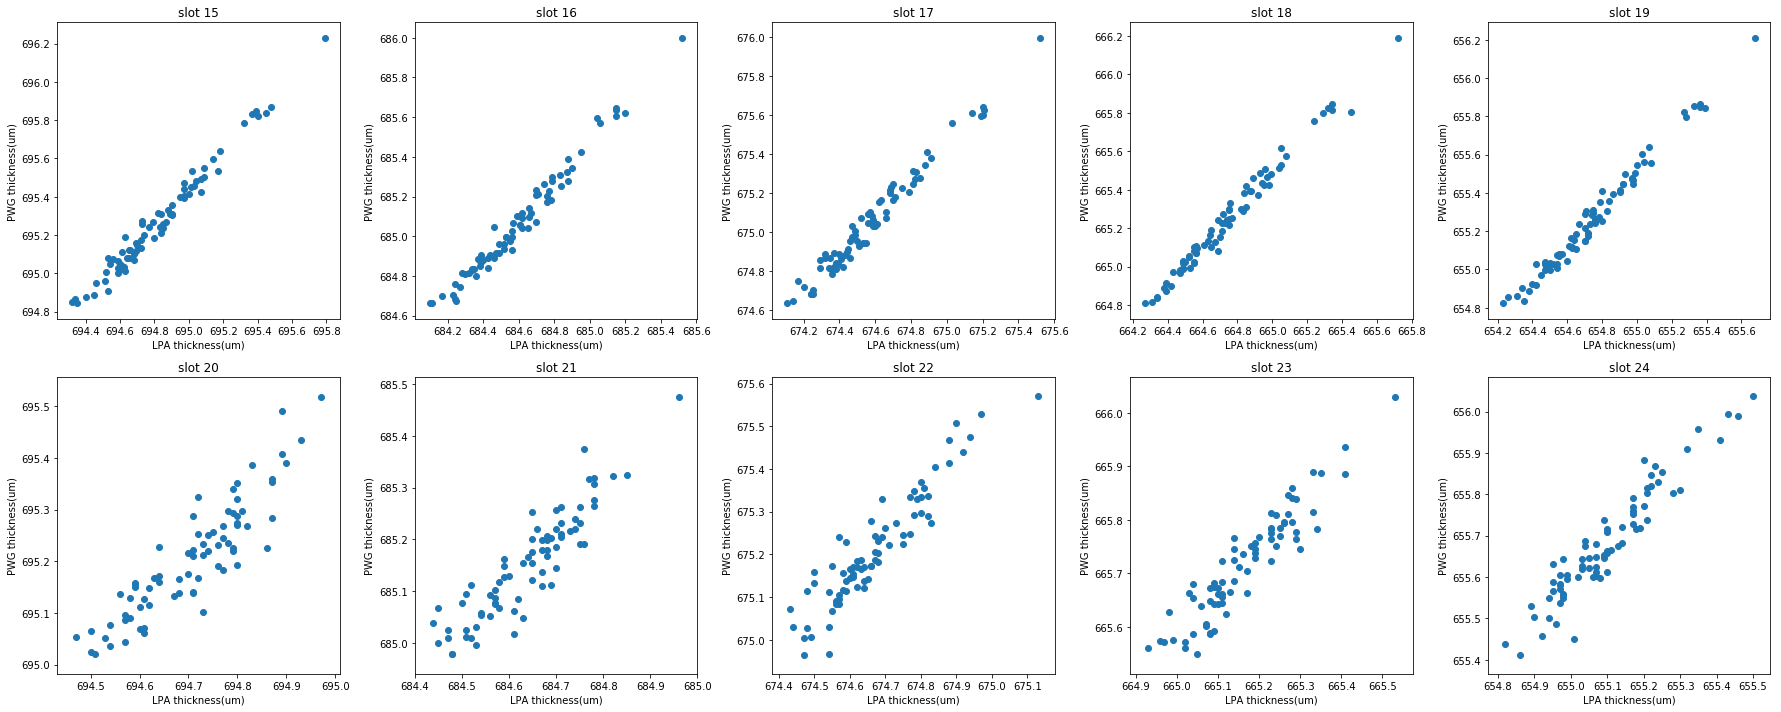

In [18]:
fig, axs = plt.subplots(2,5,figsize=(25,10))


xy_list = [(LPA_15.iloc[i]['X_60'],LPA_15.iloc[i]['Y_60']) for i in range(len(LPA_15))]

for i in range(2):
    for j in range(5):
        slot_num = 15+i*5+j
        pwg_temp = pd.read_csv(r'D:\PWG_data\To\BG_MQC\data\11pc\maps\Carrier01.' + str(slot_num)+'~Carrier01~TSB LPA precision~thickness.csv', skiprows=11)
        pwg_temp = pwg_temp.loc[pwg_index]
        pwg_temp['X_60']=pwg_temp['X [um]']/1000
        pwg_temp['Y_60']=pwg_temp['Y [um]']/1000
        LPA_temp = LPA_post[LPA_post['slot']==slot_num]
        for (x,y) in xy_list:
            tks_temp = []
            for m in range(pixel_num):
                for k in range(pixel_num):
                    x_temp = x - n*60/1000 + k*60/1000
                    y_temp = y - n*60/1000 + m*60/1000
                    pixel_tks = pwg_temp['Thickness [um]'][(pwg_temp['X_60']==x_temp)&(pwg_temp['Y_60']==y_temp)].values
                    if pixel_tks:
                        tks_temp.append(pixel_tks)
            pwg_temp['Thickness [um]'][(pwg_temp['X_60']==x)&(pwg_temp['Y_60']==y)]=np.array(tks_temp).mean()
                               
        
        corr = pd.merge(LPA_temp, pwg_temp, how='left', on=['X_60','Y_60'])
        corr = corr.dropna(subset=['Thickness [um]'])
        
        axs[i,j].scatter(corr['Thickness(um)'], corr['Thickness [um]'])
        axs[i,j].set_xlabel('LPA thickness(um)')
        axs[i,j].set_ylabel('PWG thickness(um)')
        axs[i,j].set_title('slot ' + str(slot_num))
    
        slope, intercept, r,_,_=stats.linregress(corr['Thickness(um)'],corr['Thickness [um]'])
        print("slot %d: r_square is %f; slope is %f; intercept is %f" %(slot_num, r**2, slope, intercept))

plt.tight_layout()
plt.show()
        

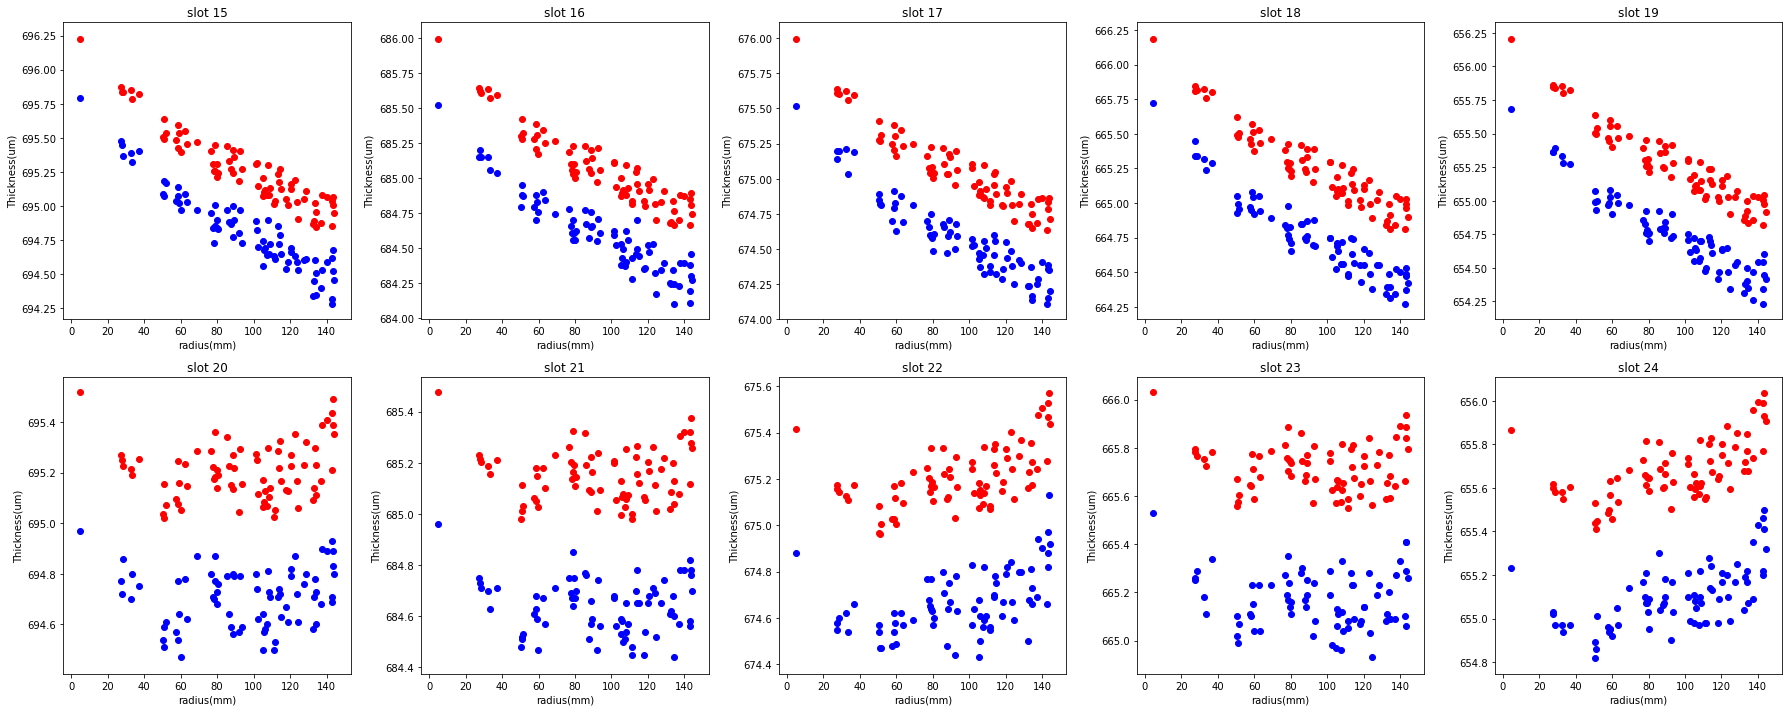

In [19]:
fig, axs = plt.subplots(2,5,figsize=(25,10))

for i in range(2):
    for j in range(5):
        slot_num = 15+i*5+j
        pwg_temp = pd.read_csv(r'D:\PWG_data\To\BG_MQC\data\11pc\maps\Carrier01.' + str(slot_num)+'~Carrier01~TSB LPA precision~thickness.csv', skiprows=11)
        pwg_temp = pwg_temp.loc[pwg_index]
        pwg_temp['X_60']=pwg_temp['X [um]']/1000
        pwg_temp['Y_60']=pwg_temp['Y [um]']/1000
        pwg_temp['radius']=np.sqrt(pwg_temp['X_60']**2 + pwg_temp['Y_60']**2)
        LPA_temp = LPA_post[LPA_post['slot']==slot_num]
        
        for (x,y) in xy_list:
            tks_temp = []
            for m in range(pixel_num):
                for k in range(pixel_num):
                    x_temp = x - n*60/1000 + k*60/1000
                    y_temp = y - n*60/1000 + m*60/1000
                    pixel_tks = pwg_temp['Thickness [um]'][(pwg_temp['X_60']==x_temp)&(pwg_temp['Y_60']==y_temp)].values
                    if pixel_tks:
                        tks_temp.append(pixel_tks)
            pwg_temp['Thickness [um]'][(pwg_temp['X_60']==x)&(pwg_temp['Y_60']==y)]=np.array(tks_temp).mean()
            
        corr = pd.merge(LPA_temp, pwg_temp, how='left', on=['X_60','Y_60'])
        #corr = corr[~corr['Thickness [um]'].isnull()]
        
        axs[i,j].scatter(corr['radius'], corr['Thickness(um)'],c='b') #LPA thickness
        axs[i,j].scatter(corr['radius'], corr['Thickness [um]'],c='r') #PWG thickness
        axs[i,j].set_xlabel('radius(mm)')
        axs[i,j].set_ylabel('Thickness(um)')
        axs[i,j].set_title('slot ' + str(slot_num))
plt.tight_layout()    
plt.show()

## Using Pivot table

In [20]:
pwg_temp = pd.read_csv(r'D:\PWG_data\To\BG_MQC\data\11pc\maps\Carrier01.' + str(15)+'~Carrier01~TSB LPA precision~thickness.csv', 
                       skiprows=11, usecols=['X [um]','Y [um]','Thickness [um]'])
pwg_temp['X_60']=pwg_temp['X [um]']/1000
pwg_temp['Y_60']=pwg_temp['Y [um]']/1000
pwg_ptable = pwg_temp.pivot_table('Thickness [um]', 'X_60','Y_60')
xy_list = [(LPA_15.iloc[i]['X_60'],LPA_15.iloc[i]['Y_60']) for i in range(len(LPA_15))]

In [21]:
%timeit pwg_temp['Thickness [um]'][(pwg_temp['X_60']==10.89)&(pwg_temp['Y_60']==10.89)]

The slowest run took 12.00 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 107 ms per loop


In [22]:
%timeit pwg_ptable[10.89][10.89] # is much faster

The slowest run took 56.53 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 17.3 µs per loop


In [23]:
xy_list = [(LPA_15.iloc[i]['X_60'],LPA_15.iloc[i]['Y_60']) for i in range(len(LPA_15))]
x_list = [x for (x,y) in xy_list]
y_list = [y for (x,y) in xy_list]

slot 15: r_square is 0.977322; slope is 0.948837; intercept is 35.996670
slot 16: r_square is 0.971836; slope is 0.979610; intercept is 14.427350
slot 17: r_square is 0.970176; slope is 0.968202; intercept is 21.923863
slot 18: r_square is 0.982000; slope is 0.972909; intercept is 18.511818
slot 19: r_square is 0.981735; slope is 0.980402; intercept is 13.350419
slot 20: r_square is 0.810174; slope is 0.864688; intercept is 94.501312
slot 21: r_square is 0.814498; slope is 0.869145; intercept is 90.100016
slot 22: r_square is 0.867473; slope is 0.894551; intercept is 71.686053
slot 23: r_square is 0.872703; slope is 0.796370; intercept is 135.998351
slot 24: r_square is 0.903539; slope is 0.923466; intercept is 50.719666


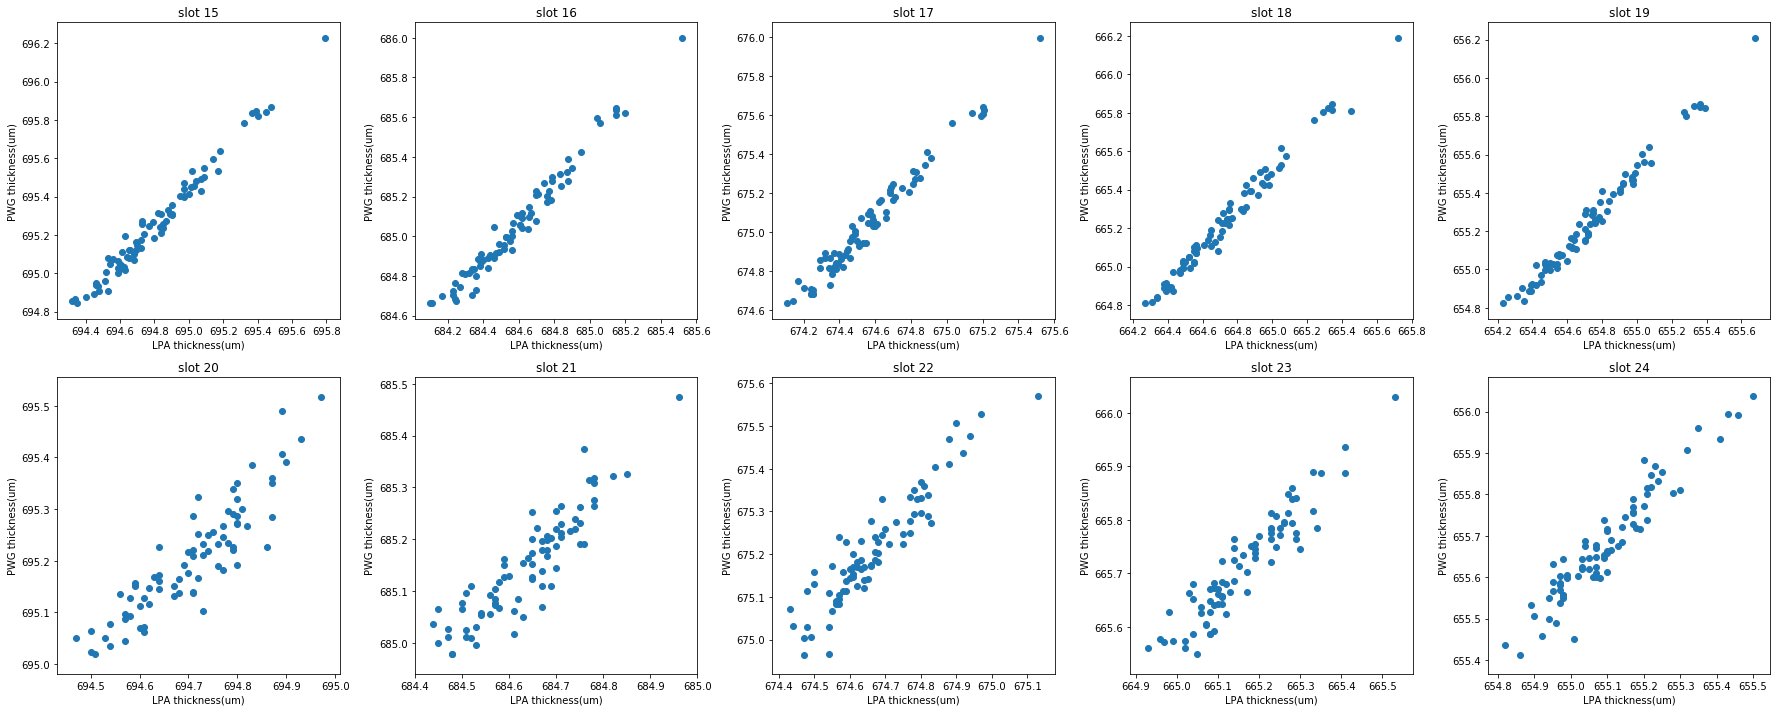

In [24]:
n = 5 # pixel numbers on one side
fig, axs = plt.subplots(2,5,figsize=(25,10))

for i in range(2):
    for j in range(5):
        slot_num = 15+i*5+j
        pwg_temp = pd.read_csv(r'D:\PWG_data\To\BG_MQC\data\11pc\maps\Carrier01.' + str(slot_num)+'~Carrier01~TSB LPA precision~thickness.csv', skiprows=11)
        pwg_temp['X_60']=pwg_temp['X [um]']/1000
        pwg_temp['Y_60']=pwg_temp['Y [um]']/1000
        pwg_ptable = pwg_temp.pivot_table('Thickness [um]', 'X_60','Y_60')
        del pwg_temp
        LPA_temp = LPA_post[LPA_post['slot']==slot_num]
        mean_tks = []
        for (x,y) in xy_list:
            y_temp = [(y - n*60/1000 + i*60/1000) for i in range(2*n+1)]
            y_temp = np.round(y_temp,2)
            tmp_table = pwg_ptable[x-n*60/1000 : x + (n)*60/1000][y_temp]
            mean_tks.append(tmp_table.stack().mean())
        del pwg_ptable
                               
        pwg_temp2 = pd.DataFrame({'X_60':x_list, 'Y_60':y_list, 'PWG_thickness[um]':mean_tks})
        corr = pd.merge(LPA_temp, pwg_temp2, how='left', on=['X_60','Y_60'])
        corr = corr.dropna(subset=['PWG_thickness[um]'])
        
        axs[i,j].scatter(corr['Thickness(um)'], corr['PWG_thickness[um]'])
        axs[i,j].set_xlabel('LPA thickness(um)')
        axs[i,j].set_ylabel('PWG thickness(um)')
        axs[i,j].set_title('slot ' + str(slot_num))
    
        slope, intercept, r,_,_=stats.linregress(corr['Thickness(um)'],corr['PWG_thickness[um]'])
        print("slot %d: r_square is %f; slope is %f; intercept is %f" %(slot_num, r**2, slope, intercept))

plt.tight_layout()
plt.show()
        

C:\Users\xshen\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


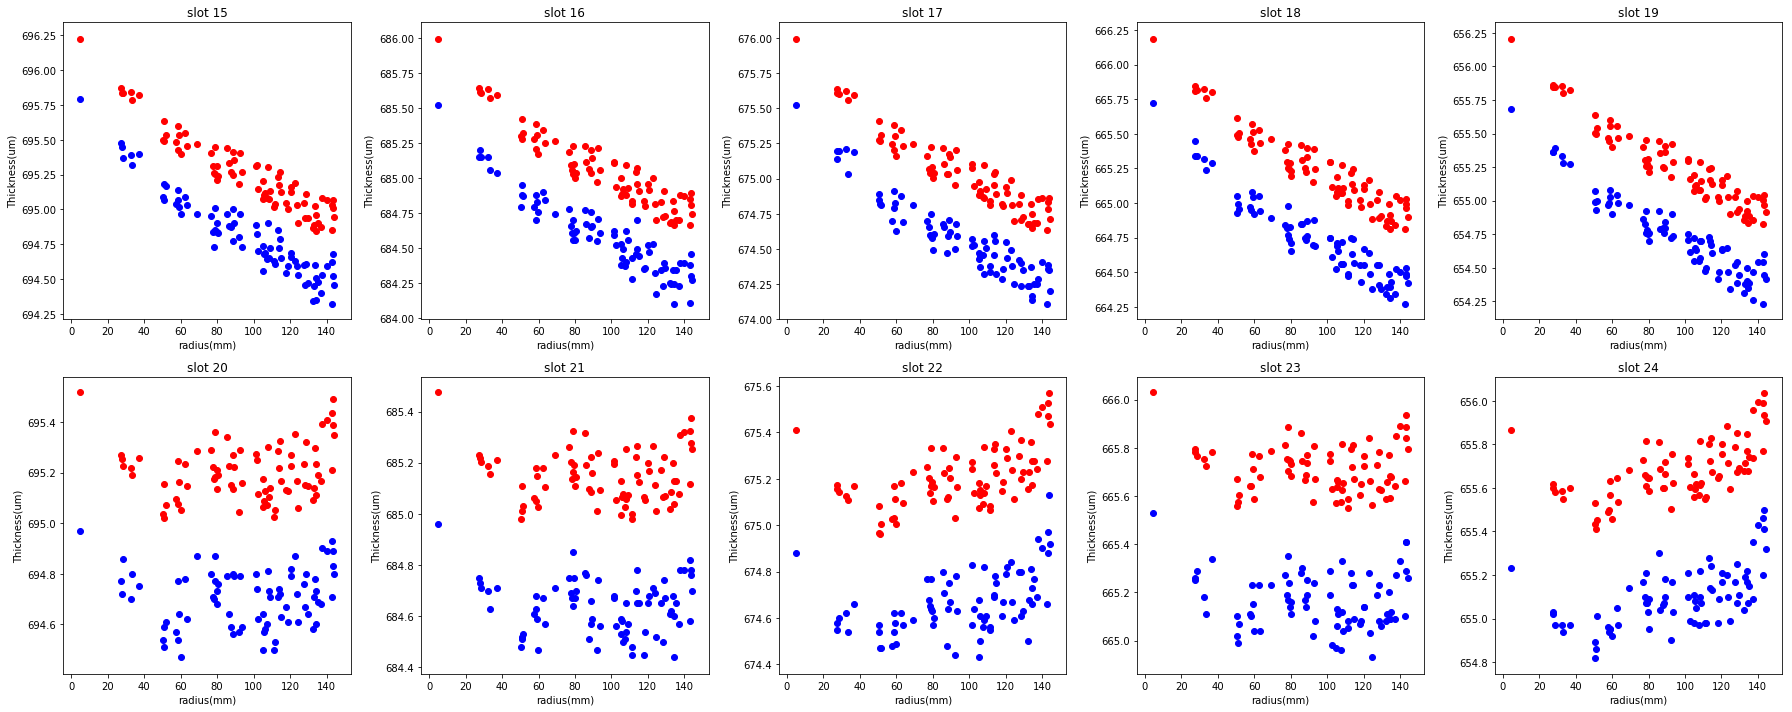

In [25]:
fig, axs = plt.subplots(2,5,figsize=(25,10))

for i in range(2):
    for j in range(5):
        slot_num = 15+i*5+j
        pwg_temp = pd.read_csv(r'D:\PWG_data\To\BG_MQC\data\11pc\maps\Carrier01.' + str(slot_num)+'~Carrier01~TSB LPA precision~thickness.csv', skiprows=11)
        pwg_temp['X_60']=pwg_temp['X [um]']/1000
        pwg_temp['Y_60']=pwg_temp['Y [um]']/1000
        pwg_ptable = pwg_temp.pivot_table('Thickness [um]', 'X_60','Y_60')
        del pwg_temp
        LPA_temp = LPA_post[LPA_post['slot']==slot_num]
        LPA_temp['radius']=np.sqrt(LPA_temp['X_60']**2 + LPA_temp['Y_60']**2)
        
        mean_tks = []
        for (x,y) in xy_list:
            y_temp = [(y - n*60/1000 + i*60/1000) for i in range(2*n+1)]
            y_temp = np.round(y_temp,2)
            tmp_table = pwg_ptable[x-n*60/1000 : x + (n)*60/1000][y_temp]
            mean_tks.append(tmp_table.stack().mean())
        del pwg_ptable
                               
        pwg_temp2 = pd.DataFrame({'X_60':x_list, 'Y_60':y_list, 'PWG_thickness[um]':mean_tks})
        corr = pd.merge(LPA_temp, pwg_temp2, how='left', on=['X_60','Y_60'])
        corr = corr.dropna(subset=['PWG_thickness[um]'])
        
        axs[i,j].scatter(corr['radius'], corr['Thickness(um)'],c='b') #LPA thickness
        axs[i,j].scatter(corr['radius'], corr['PWG_thickness[um]'],c='r') #PWG thickness
        axs[i,j].set_xlabel('radius(mm)')
        axs[i,j].set_ylabel('Thickness(um)')
        axs[i,j].set_title('slot ' + str(slot_num))
plt.tight_layout()    
plt.show()